In [72]:
#Spotify Song Generator Iteration 1
#Redirect URL: http://localhost
!pip install --upgrade pip
!pip install spotipy --upgrade

In [73]:
#  !export SPOTIPY_CLIENT_ID='b65f2e72e2f54b76ad15011d1fb65314'
#  !export SPOTIPY_CLIENT_SECRET='474c1c7a6b3545ea886b17b9915e8482'
#  !export SPOTIPY_REDIRECT_URI='http://localhost'

In [74]:
import spotipy
from spotipy.oauth2 import SpotifyOAuth

scope = "user-library-read"
client_id = "b65f2e72e2f54b76ad15011d1fb65314"
client_secret = "eaf0b21dab974704bd570ec26d8046f6"
redirect_uri = "http://localhost"


# Set up authorization using OAuth-used Authorized Code Flow to extract primary use rdata.
#Relevang URL: ChatGPT
sp = spotipy.Spotify(auth_manager=SpotifyOAuth(client_id=client_id,
                                               client_secret=client_secret,
                                               redirect_uri=redirect_uri,
                                               cache_path='/Users/abhiacherjee/Desktop/spotipy_cache_2',
                                               open_browser=False,
                                               scope="user-library-read"))

In [75]:
#playlist_id = 'https://open.spotify.com/playlist/4yup05bwOcS1t0I6bX50tJ?si=7e43895ce78148f6'
#cluster 1 playlist id:
playlist_id = 'https://open.spotify.com/playlist/3oxq59lYMwAKVBDXnAIx6h?si=e412c4258a19434b'
playlist = sp.playlist(playlist_id)

# Access playlist details
playlist_name = playlist['name']
tracks = playlist['tracks']

# Iterate over tracks
for item in tracks['items']:
    track = item['track']
    track_name = track['name']
    artist_name = track['artists'][0]['name']

In [76]:
import pandas as pd

# Create a DataFrame from the retrieved data
playlist_data = []
for item in tracks['items']:
    track = item['track']
    track_name = track['name']
    artist_name = track['artists'][0]['name']
    playlist_data.append({'Track Name': track_name, 'Artist': artist_name})

df = pd.DataFrame(playlist_data)

In [77]:
df.head()

,Track Name,Artist
0,Boulevard of Broken Dreams,Green Day
1,Numb,Linkin Park
2,Something In The Way,Nirvana
3,Come As You Are,Nirvana
4,In the End,Linkin Park


In [78]:
playlist_link='https://open.spotify.com/playlist/3oxq59lYMwAKVBDXnAIx6h?si=d9aa8e80a31a4cc7'
playlist_URI = playlist_link.split("/")[-1].split("?")[0]
track_uris = [x["track"]["uri"] for x in sp.playlist_tracks(playlist_URI)["items"]]

In [79]:
column_names=["track_name","artist","popularity","genre","track_popularity","danceability","energy","key","loudness","mode","speechiness","acousticness","instrumentalness"
 ,"liveness","valence","tempo"]
df=pd.DataFrame(columns=column_names)
df.head()
for track in sp.playlist_tracks(playlist_URI)["items"]:
    #URI
    track_uri = track["track"]["uri"]

    #Track name
    track_name = track["track"]["name"]

    #Main Artist
    artist_uri = track["track"]["artists"][0]["uri"]
    artist_info = sp.artist(artist_uri)

    #Name, popularity, genre
    artist_name = track["track"]["artists"][0]["name"]
    artist_pop = artist_info["popularity"]
    artist_genres = artist_info["genres"]

    #Album
    album = track["track"]["album"]["name"]

    #Popularity of the track
    track_pop = track["track"]["popularity"]

    list_1=[track_name,artist_name,artist_pop,artist_genres,track_pop,sp.audio_features(track_uri)[0]["danceability"],
         sp.audio_features(track_uri)[0]["energy"],sp.audio_features(track_uri)[0]["key"],
         sp.audio_features(track_uri)[0]["loudness"],sp.audio_features(track_uri)[0]["mode"],
         sp.audio_features(track_uri)[0]["speechiness"],sp.audio_features(track_uri)[0]["acousticness"],
         sp.audio_features(track_uri)[0]["instrumentalness"],sp.audio_features(track_uri)[0]["liveness"],
         sp.audio_features(track_uri)[0]["valence"],sp.audio_features(track_uri)[0]["tempo"]]
    df.loc[len(df)] = list_1


In [80]:
df.head()


,track_name,artist,popularity,genre,track_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,Boulevard of Broken Dreams,Green Day,77,"[modern rock, permanent wave, punk, rock]",80,0.496,0.682,8,-4.095,1,0.0294,0.00552,0.000029,0.0589,0.4740,167.060
1,Numb,Linkin Park,83,"[alternative metal, nu metal, post-grunge, rap...",89,0.496,0.863,9,-4.153,1,0.0381,0.00460,0.000000,0.6390,0.2430,110.018
2,Something In The Way,Nirvana,79,"[grunge, permanent wave, rock]",74,0.427,0.201,8,-13.044,1,0.0317,0.74500,0.263000,0.1090,0.0668,105.218
3,Come As You Are,Nirvana,79,"[grunge, permanent wave, rock]",80,0.500,0.824,4,-5.846,0,0.0388,0.00016,0.001610,0.0916,0.5390,120.125
4,In the End,Linkin Park,83,"[alternative metal, nu metal, post-grunge, rap...",89,0.556,0.864,3,-5.870,0,0.0584,0.00958,0.000000,0.2090,0.4000,105.143


In [81]:
min_danceability = 0.7
max_danceability = 0.8

# Set your desired genre
target_genre = 'pop'

# Search for tracks of the target genre
results = sp.search(q=f'genre:{target_genre}', type='track', limit=50)

# Filter tracks based on danceability range
filtered_tracks = []
for track in results['tracks']['items']:
    track_id = track['id']
    audio_features = sp.audio_features(track_id)[0]
    danceability = audio_features['danceability']
    if min_danceability <= danceability <= max_danceability:
        filtered_tracks.append(track)

# Print track names and URIs
for track in filtered_tracks:
    print(f"Track: {track['name']}")
    print(f"URI: {track['uri']}")


Track: Cupid - Twin Ver.
URI: spotify:track:7FbrGaHYVDmfr7KoLIZnQ7
Track: Heat Waves
URI: spotify:track:3USxtqRwSYz57Ewm6wWRMp
Track: Blank Space
URI: spotify:track:1p80LdxRV74UKvL8gnD7ky
Track: Flowers
URI: spotify:track:0yLdNVWF3Srea0uzk55zFn
Track: Barbie World (with Aqua) [From Barbie The Album]
URI: spotify:track:741UUVE2kuITl0c6zuqqbO
Track: I Ain't Worried
URI: spotify:track:4h9wh7iOZ0GGn8QVp4RAOB
Track: Attention
URI: spotify:track:11xC6P3iKYpFThT6Ce1KdG
Track: Speak Now (Taylor's Version)
URI: spotify:track:5xXqyjLicvEpch72qEryFT


In [82]:
sp.audio_features(track_uri)[0]
# print(df.track_popularity.std)
# print(df.popularity.std())
column_names=["popularity","track_popularity","danceability","energy","key","loudness","mode","speechiness","acousticness","instrumentalness"
 ,"liveness","valence","tempo"]
values=[]


for column in column_names:
    print(column,"\n")
    print(df[column].mean(),"\n")
    values.append(df[column].std())
    print(df[column].std(),"\n")

popularity 

77.9 

4.771442828607157 

track_popularity 

79.3 

7.789594198530356 

danceability 

0.5172 

0.11853625793167441 

energy 

0.7614 

0.20786651699802183 

key 

6.6 

3.2386554137309647 

loudness 

-5.6895 

2.7025161218555 

mode 

0.5 

0.5270462766947299 

speechiness 

0.03563000000000001 

0.008934707605736183 

acousticness 

0.09566 

0.22933751352779402 

instrumentalness 

0.02665304 

0.08304702956286877 

liveness 

0.22875 

0.21844745745068003 

valence 

0.40847999999999995 

0.19882408081294153 

tempo 

118.7352 

24.206638331021693 



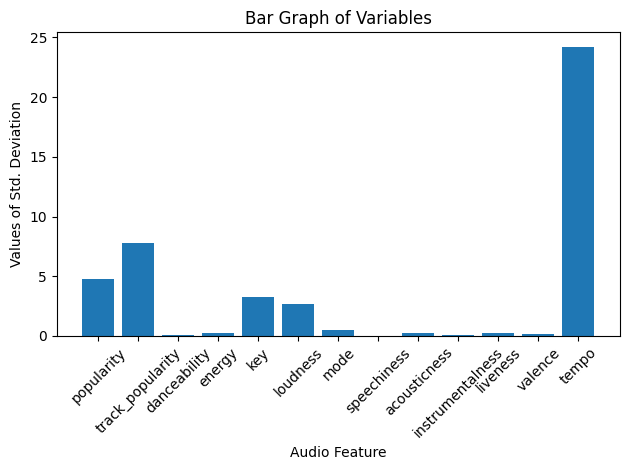

In [83]:
import matplotlib.pyplot as plt

# Variables and their corresponding values
variables = ["popularity","track_popularity","danceability","energy","key","loudness","mode","speechiness","acousticness","instrumentalness"
 ,"liveness","valence","tempo"]

# Create the bar graph
plt.bar(variables, values, align='center')

# Set labels and title
plt.xlabel('Audio Feature')
plt.ylabel('Values of Std. Deviation')
plt.title('Bar Graph of Variables')

plt.xticks(range(len(variables)), variables, rotation=45
          )

# Adjust the figure size if needed
plt.tight_layout()
# Display the graph
plt.show()

In [84]:
import numpy as np

n = 5  # Number of lowest values to find
values=np.array(values)
# Find the indices of the lowest n values
indices = np.argpartition(values, n)[:n]

# Get the lowest n values using the indices
lowest_values = values[indices.astype(int)]
dict_avg={}
dict_std={}
# Print the lowest values and their indices
for i in range(n):
    dict_std[variables[indices[i]]]=lowest_values[i]
    print(f"Value: {lowest_values[i]}, Index: {indices[i]}")
    print(variables[indices[i]])


Value: 0.19882408081294153, Index: 11
valence
Value: 0.08304702956286877, Index: 9
instrumentalness
Value: 0.11853625793167441, Index: 2
danceability
Value: 0.20786651699802183, Index: 3
energy
Value: 0.008934707605736183, Index: 7
speechiness


In [113]:
min_d = max((0.5172-dict_std['danceability']),0)  
max_d = 0.5172+dict_std['danceability']

min_i = max((0.02665304 -dict_std['instrumentalness']),0) 
max_i = 0.02665304+dict_std['instrumentalness']

min_v = max((0.40847999999999995 -dict_std['valence']),0)
max_v = 0.40847999999999995+dict_std['valence']

min_e = max((0.7614-dict_std['energy']),0)
max_e = 0.7614+dict_std['energy']

min_s = max((0.03563-dict_std['speechiness']),0)
max_s = 0.03563+dict_std['speechiness']


# Set your desired genres as a list
target_genres = ['alternative metal', 'nu metal', 'post-grunge','modern rock', 'permanent wave', 'punk', 'rock']
#target_genres = ['alternative metal',  'post-grunge','modern rock']
# feature_ranges = {
#     'danceability': (min_d, max_d),
#     'instrumentalness': (max_i, min_i),
#     'valence': (min_v, max_v),
#     'energy': (min_e, max_e),
#     'speechiness': (min_s, max_s)
# }
feature_ranges = {
    'danceability': (0.1, 0.55),
     #'instrumentalness': (0.01, 0.03),
    'valence': (0.1, 0.5),
    'energy': (0.4, 0.8)}
    #'speechiness': (0.01, 0.05)}


# Create a comma-separated string of genres
genres_string = ','.join(target_genres)

# Search for tracks of the target genres
results = sp.search(q=f'genre:{genres_string}', type='track', limit=50)

# Filter tracks based on audio feature ranges
filtered_tracks = []
for genre in target_genres:
    results = sp.search(q=f'genre:{genre}', type='track', limit=50)

    # Filter tracks based on audio feature ranges
    for track in results['tracks']['items']:
        track_id = track['id']
        audio_features = sp.audio_features(track_id)[0]
        is_within_range = all(
            feature_ranges[feature][0] <= audio_features[feature] <= feature_ranges[feature][1]
            for feature in feature_ranges
        )
        if is_within_range:
          filtered_tracks.append(track)

# Count the frequency of each track and select tracks that belong to all genres
final_tracks = [track for track in filtered_tracks]
print(type(final_tracks))
# Remove duplicate tracks
#final_tracks = list(set(final_tracks))
#final_tracks = list(set(final_tracks))

# Print track names and URIs
for track in final_tracks:
    print(f"Track: {track['name']}")
    print(f"URI: {track['uri']}")

<class 'list'>
Track: Heavy Metal
URI: spotify:track:621W0YFtYurfPC6hwvmWgc
Track: Metallic 5's
URI: spotify:track:1ENAUhyZKLYaZuItF9xB2X
Track: Paranoid
URI: spotify:track:4OGy1pTfVBURYQBdaaWBp8
Track: Iris
URI: spotify:track:6Qyc6fS4DsZjB2mRW9DsQs
Track: Push
URI: spotify:track:2KVwlelhxKUy8LVV6JypH3
Track: Snow - Live
URI: spotify:track:2L1M0A9Rymjayfni3IKeJe
Track: Cottonmouth (Rock Mix)
URI: spotify:track:0wCXdCprsEdga0yF9rBuFp
Track: Something in the Orange - Live
URI: spotify:track:63Te6rFAEF37YmJ9HwqSzN
Track: Burn, Burn, Burn - Live
URI: spotify:track:4hVqks34N1X3Bh2xejk3QP
Track: Oklahoma City - Live
URI: spotify:track:6qtsmjLGlyoTlUMjV7Xx1C
Track: God Speed - Live
URI: spotify:track:5NuSj7dx2yt34dDGqnSqvA
Track: Sweet DeAnn - Live
URI: spotify:track:0GC43uyv1rSUW0y9ODjq4u
Track: Highway Boys - Live
URI: spotify:track:4GHy77t3CBv9U4aHKs7rsp
Track: The Longest Wave
URI: spotify:track:0pjCkLjbgSLn5c0Ilwuv8z
Track: Where Is My Mind?
URI: spotify:track:0m5uRpKPNyIOxgRYrw2wpZ
Trac

In [114]:
print(len(final_tracks))

29


In [ ]:
print()